# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [10]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,388,94,47,85,333,138,49,155,43,19,155,320,354,187,135,12,9,188,196
1,318,89,37,51,111,54,5,120,56,17,127,138,213,147,82,7,4,181,183
2,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
3,168,82,45,68,139,64,6,147,46,19,143,169,320,184,80,0,1,181,184
4,281,82,43,73,154,65,7,151,44,19,143,178,341,160,76,5,11,185,189
5,188,101,51,105,212,68,10,209,32,24,162,222,653,224,73,5,23,186,195
6,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184
7,222,100,50,81,197,67,6,186,34,22,158,206,531,198,74,6,1,197,198
8,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
9,307,107,52,103,186,57,11,214,31,24,162,217,676,189,66,6,5,189,198


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [11]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.105647,93.923497,45.156648,82.444444,169.939891,61.714026,8.561020,169.890710,40.757741,20.668488,148.599271,189.599271,445.938069,176.098361,72.542805,6.526412,12.821494,188.941712,195.657559
std,247.315617,8.260890,6.238351,16.178270,34.938345,8.347177,4.623252,34.128927,8.030823,2.666248,14.710952,32.384490,181.405763,32.959572,7.759647,4.896906,8.808227,6.317357,7.601577
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,196.000000,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,151.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,406.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,367.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,626.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,218.000000,607.000000,201.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [12]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [13]:
### YOUR CODE HERE
'''
subsract mean and devide by std is usual way to simplify gradient descent
I'm not sure whether use data.mean or X_train.mean?
'''
X_mean = data.mean(axis = 0)
X_std  = data.std(axis = 0)
X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std
X_train.mean(axis=0)

array([-0.04256161,  0.02977181,  0.04783261,  0.02257247,  0.0298631 ,
        0.00255874, -0.00138216,  0.03164655, -0.02255234,  0.03309876,
        0.0413904 ,  0.03104179,  0.03412869,  0.04288869,  0.01077576,
        0.03038242,  0.024894  ,  0.00147527,  0.00338581])

In [14]:
'''
transform car labels to numbers to simplify classification process
'''
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)

classes = {'van': 0, 'bus': 1, 'saab': 2, 'opel': 3}
NUM_CLASSES = 4

y_train_pd.replace(classes, inplace = True)
y_test_pd.replace(classes, inplace = True)

y_train = y_train_pd.values.squeeze(1)
y_test = y_test_pd.values.squeeze(1)
y_train.shape

(549,)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [15]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(multi_class = 'multinomial')

param_grid = {'solver' :  ['newton-cg', 'sag', 'saga', 'lbfgs'], 'C' : np.linspace(0.01, 1, 10)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print('best params: ', grid_search.best_params_)

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

best params:  {'C': 0.67, 'solver': 'saga'}


/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


test_accuracy:  0.7676767676767676


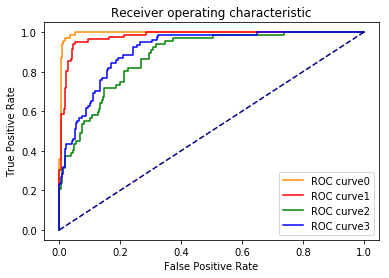

f1_score (4 classes):  [0.93150685 0.8902439  0.62251656 0.60150376]


In [17]:
best_logistic_clf = LogisticRegression(C = grid_search.best_params_['C'],
                                    solver = grid_search.best_params_['solver'],
                                    multi_class = 'multinomial')
best_logistic_clf.fit(X_train, y_train)

print("test_accuracy: ", best_logistic_clf.score(X_test, y_test))

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

roc_ret = []
def show_roc_curve(best_clf, X_test, y_test):
    y_true = y_test
    y_pred = best_clf.predict_proba(X_test)

    for i in range(NUM_CLASSES):
        roc_ret.append(roc_curve(y_true, y_pred[:, i], pos_label = i))
        
    plt.figure()
    plt.plot(roc_ret[0][0], roc_ret[0][1], color='darkorange', label='ROC curve0')
    plt.plot(roc_ret[1][0], roc_ret[1][1], color='red', label='ROC curve1')
    plt.plot(roc_ret[2][0], roc_ret[2][1], color='green', label='ROC curve2')
    plt.plot(roc_ret[3][0], roc_ret[3][1], color='blue', label='ROC curve3')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred_classes = best_clf.predict(X_test)
    print("f1_score (4 classes): ", f1_score(y_true, y_pred_classes, average = None))

show_roc_curve(best_logistic_clf, X_test, y_test)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [18]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

ratios = []
for i in range(1, 20, 1):
    pca = PCA(n_components = i)
    pca.fit(X_train)
    ratios.append(pca.explained_variance_ratio_)
    ratios[i-1] = np.mean(ratios[i-1])
    
print(ratios)

[0.5030474403321329, 0.33126369804580647, 0.25667253939294205, 0.206894965850484, 0.17586650182301855, 0.15415426439915206, 0.13575726419048967, 0.1207671407370571, 0.1085866360088405, 0.09851227475361998, 0.08998999489075937, 0.0827515805139404, 0.07656226282094408, 0.0712267298975572, 0.06655020756729715, 0.0624389782054802, 0.058804110757458915, 0.055554621081315675, 0.05263157894736842]


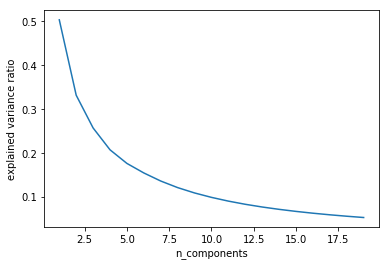

In [20]:
plt.figure()
plt.plot([i for i in range(1, 20, 1)], ratios)

plt.xlabel('n_components')
plt.ylabel('explained variance ratio')

plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [22]:
'''
number of components should be less 19 (original dimension) and still make good score
as you see further choosing n_components = 10 decreases accuracy in 10% (not so bad)
'''
pca = PCA(n_components = 10)
print(X_train.shape)

#remember original X_s
X_train_norm = X_train
X_test_norm = X_test

#transform to new dimension
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(549, 10)
(549, 10)
(297, 10)


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [23]:
### YOUR CODE HERE
clf = LogisticRegression(multi_class = 'multinomial')

param_grid = {'solver' :  ['newton-cg', 'sag', 'saga', 'lbfgs'], 'C' : np.linspace(0.01, 1, 10)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print('best_params: ', grid_search.best_params_)

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

best_params:  {'C': 0.89, 'solver': 'sag'}


/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


test_accuracy:  0.7003367003367004


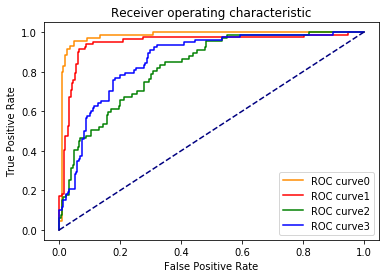

f1_score (4 classes):  [0.87581699 0.85542169 0.53246753 0.47933884]


In [24]:
best_clf = LogisticRegression(C = grid_search.best_params_['C'],
                                solver = grid_search.best_params_['solver'],
                                multi_class = 'multinomial')
best_clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve
print("test_accuracy: ", best_clf.score(X_test, y_test))

roc_ret = []

show_roc_curve(best_clf, X_test, y_test)


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [25]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
clf = DecisionTreeClassifier()

param_grid = {'max_depth' : range(1, 200, 1)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train_norm, y_train)
print('best_params: ', grid_search.best_params_)

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best_params:  {'max_depth': 11}


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score on original data
test_accuracy:  0.622895622895623


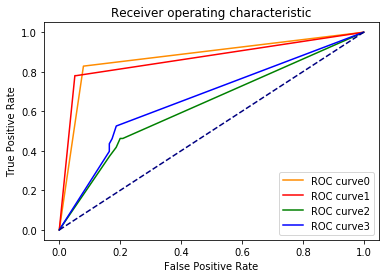

f1_score (4 classes):  [0.79452055 0.81012658 0.41958042 0.44897959]


In [27]:
best_tree_clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
best_tree_clf.fit(X_train_norm, y_train)

from sklearn.metrics import roc_curve
print("score on original data")
print("test_accuracy: ", best_tree_clf.score(X_test_norm, y_test))

roc_ret = []

show_roc_curve(best_tree_clf, X_test_norm, y_test)


In [28]:
clf = DecisionTreeClassifier()

param_grid = {'max_depth' : range(1, 200, 1)}
grid_search = GridSearchCV(clf, param_grid).fit(X_train, y_train)
print('best_params: ', grid_search.best_params_)

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best_params:  {'max_depth': 11}


/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score on transformed data
test_accuracy:  0.6026936026936027


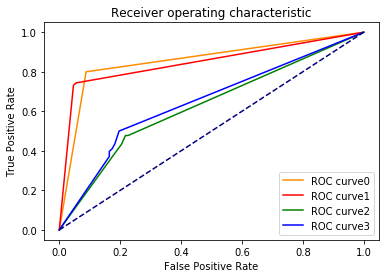

f1_score (4 classes):  [0.76712329 0.78709677 0.41891892 0.42758621]


In [29]:
best_clf = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
best_clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve
print("score on transformed data")
print("test_accuracy: ", best_clf.score(X_test, y_test))

roc_ret = []

show_roc_curve(best_clf, X_test, y_test)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [40]:
# YOUR CODE HERE
#little research on what happens if we do not bound max tree depth
#actually it does not change a lot
#best_tree_clf = DecisionTreeClassifier()

from sklearn.ensemble import BaggingClassifier
logistic_clf_s = []
tree_clf_s = []
for i in range(2, 51, 2):
    logistic_clf_s.append(BaggingClassifier(base_estimator = best_logistic_clf, n_estimators = i))
    tree_clf_s.append(BaggingClassifier(base_estimator = best_tree_clf, n_estimators = i))

#logistic
train_log_scores = []
test_log_scores = []
train_log_f1_scores = []
test_log_f1_scores = []
for clf in logistic_clf_s:
    clf.fit(X_train_norm, y_train)
    train_log_scores.append(clf.score(X_train_norm, y_train))
    test_log_scores.append(clf.score(X_test_norm, y_test))
    
    train_log_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_log_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))
    
#tree
train_tree_scores = []
test_tree_scores = []
train_tree_f1_scores = []
test_tree_f1_scores = []
for clf in tree_clf_s:
    clf.fit(X_train_norm, y_train)
    train_tree_scores.append(clf.score(X_train_norm, y_train))
    test_tree_scores.append(clf.score(X_test_norm, y_test))
    
    train_tree_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_tree_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

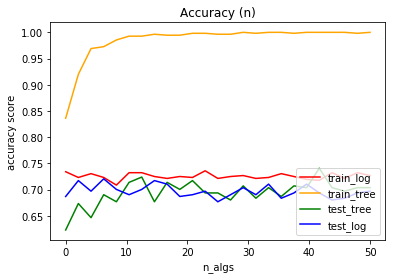

In [41]:
plt.figure()
plt.plot(np.linspace(0, 50, 25), train_log_scores, color='red', label = 'train_log')
plt.plot(np.linspace(0, 50, 25), train_tree_scores, color='orange', label = 'train_tree')
plt.plot(np.linspace(0, 50, 25), test_tree_scores, color='green', label = 'test_tree')
plt.plot(np.linspace(0, 50, 25), test_log_scores, color='blue', label = 'test_log')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Accuracy (n)')
plt.legend(loc="lower right")
plt.show()

По графику трудно определить наилучшее количество моделей - на тесте наблюдается слишком большой разброс в точности; графики меняются в зависимости от запуска. Поэтому я брала количество моделей в районе 20-30: точность на тесте максимальна, а число моделей не слишком большое.
Изменение максимальной глубины дерева не дало существенных результатов - оптимальная глубина, подобранная ранее оказалась действительно оптимальной :)


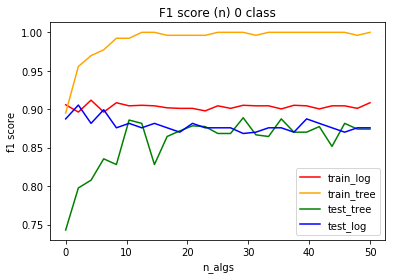

In [43]:
train_log_f1_scores = np.array(train_log_f1_scores)
test_log_f1_scores = np.array(test_log_f1_scores)
train_tree_f1_scores = np.array(train_tree_f1_scores)
test_tree_f1_scores = np.array(test_tree_f1_scores)

plt.figure()
plt.plot(np.linspace(0, 50, 25), train_log_f1_scores[:, 0], color='red', label = 'train_log')
plt.plot(np.linspace(0, 50, 25), train_tree_f1_scores[:, 0], color='orange', label = 'train_tree')
plt.plot(np.linspace(0, 50, 25), test_tree_f1_scores[:, 0], color='green', label = 'test_tree')
plt.plot(np.linspace(0, 50, 25), test_log_f1_scores[:, 0], color='blue', label = 'test_log')

plt.xlabel('n_algs')
plt.ylabel('f1 score')
plt.title('F1 score (n) 0 class')
plt.legend(loc="lower right")
plt.show()

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

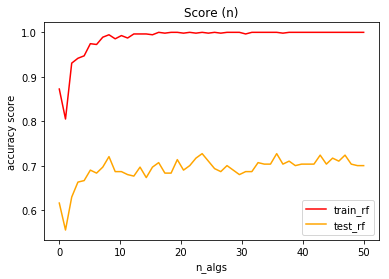

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_s = []
for i in range(1, 51):
    rf_clf_s.append(RandomForestClassifier(n_estimators = i))
    
train_rf_scores = []
test_rf_scores = []
train_rf_f1_scores = []
test_rf_f1_scores = []
for clf in rf_clf_s:
    clf.fit(X_train_norm, y_train)
    train_rf_scores.append(clf.score(X_train_norm, y_train))
    test_rf_scores.append(clf.score(X_test_norm, y_test))
    
    train_rf_f1_scores.append(f1_score(y_train, clf.predict(X_train_norm), average = None))
    test_rf_f1_scores.append(f1_score(y_test, clf.predict(X_test_norm), average = None))
    
plt.figure()
plt.plot(np.linspace(0, 50, 50), train_rf_scores, color='red', label = 'train_rf')
plt.plot(np.linspace(0, 50, 50), test_rf_scores, color='orange', label = 'test_rf')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Score (n)')
plt.legend(loc="lower right")
plt.show()

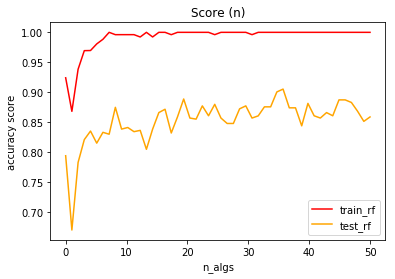

In [45]:
train_rf_f1_scores = np.array(train_rf_f1_scores)
test_rf_f1_scores = np.array(test_rf_f1_scores)

plt.figure()
plt.plot(np.linspace(0, 50, 50), train_rf_f1_scores[:, 0], color='red', label = 'train_rf')
plt.plot(np.linspace(0, 50, 50), test_rf_f1_scores[:, 0], color='orange', label = 'test_rf')

plt.xlabel('n_algs')
plt.ylabel('accuracy score')
plt.title('Score (n)')
plt.legend(loc="lower right")
plt.show()

Random Forest ведет себя очень похоже на Bagging: достигает тех же значений точности и f1_score на тесте. Поэтому и оптимальное число деревьев совпадает

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [57]:
X_train_norm.shape
coef = 55 #X_train_norm.shape[0] / 10

#0 - logistic; 1 - tree; 2 - bagging logistic; 3 - bagging tree; 4 - random forest
train_scores = [[], [], [], [], []]
test_scores = [[], [], [], [], []]
train_f1_scores = [[], [], [], [], []]
test_f1_scores = [[], [], [], [], []]

logistic = best_logistic_clf
decision_tree = best_tree_clf
bag_logistic = logistic_clf_s[24]
bag_decision_tree = tree_clf_s[24]
random_forest = rf_clf_s[34]

model_arr = [logistic, decision_tree, bag_logistic, bag_decision_tree, random_forest]

for i in range(1, 11):
    for j in range(len(model_arr)):
        model_arr[j].fit(X_train_norm[0:i*coef], y_train[0:i*coef])
        
        train_scores[j].append(model_arr[j].score(X_train_norm[0:i*coef], y_train[0:i*coef]))
        test_scores[j].append(model_arr[j].score(X_test_norm[0:i*coef], y_test[0:i*coef]))
        
        train_f1_scores[j].append(f1_score(y_train[0:i*coef], 
                                           model_arr[j].predict(X_train_norm[0:i*coef]),
                                           average = None))
        test_f1_scores[j].append(f1_score(y_test[0:i*coef], 
                                          model_arr[j].predict(X_test_norm[0:i*coef]),
                                          average = None))
        
train_f1_scores = np.array(train_f1_scores)
test_f1_scores = np.array(test_f1_scores)
train_f1_scores.shape

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(5, 10, 4)

In [58]:
def show_acc_score(ind, label):
    plt.figure()
    plt.plot(np.linspace(50, 550, 10), train_scores[ind], color='red', label = 'train')
    plt.plot(np.linspace(50, 550, 10), test_scores[ind], color='orange', label = 'test')

    plt.xlabel('n_samples')
    plt.ylabel('accuracy score')
    plt.title(label)
    plt.legend(loc="lower right")
    plt.show()
def show_f1_score(ind, label):
    plt.figure()
    plt.plot(np.linspace(50, 550, 10), train_f1_scores[ind, :, 0], color='red', label = 'train')
    plt.plot(np.linspace(50, 550, 10), test_f1_scores[ind, :, 0], color='orange', label = 'test')

    plt.xlabel('n_samples')
    plt.ylabel('f1 score')
    plt.title(label)
    plt.legend(loc="lower right")
    plt.show()

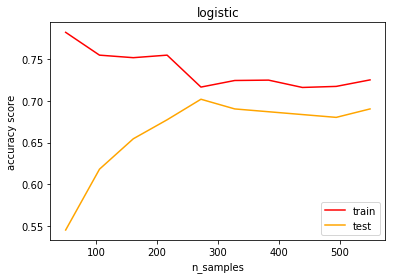

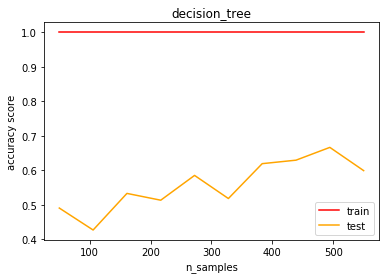

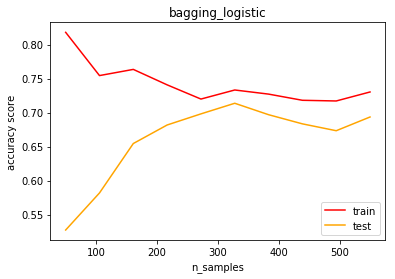

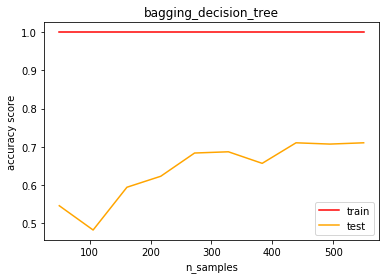

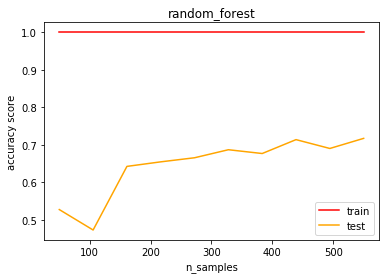

In [59]:
show_acc_score(0, 'logistic')
show_acc_score(1, 'decision_tree')
show_acc_score(2, 'bagging_logistic')
show_acc_score(3, 'bagging_decision_tree')
show_acc_score(4, 'random_forest')

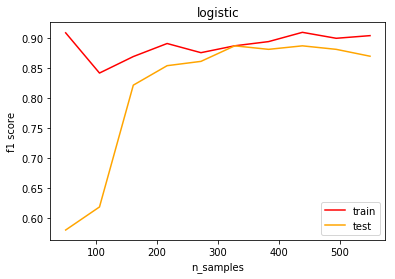

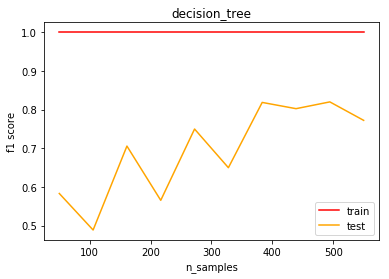

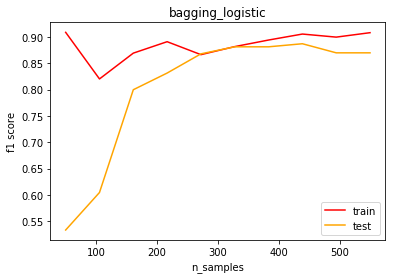

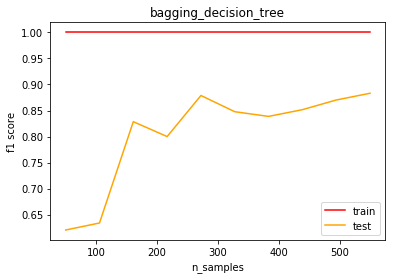

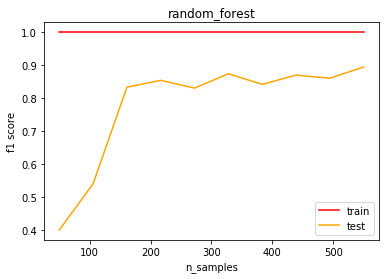

In [60]:
show_f1_score(0, 'logistic')
show_f1_score(1, 'decision_tree')
show_f1_score(2, 'bagging_logistic')
show_f1_score(3, 'bagging_decision_tree')
show_f1_score(4, 'random_forest')

#### Выводы
* Вполне ожидаемо качество классификации(accuracy и f1_score на тестовой выборке) растет с увеличением обучающей выборки для всех моделей
* Видно, что деревья и их ансамбли очень быстро и хорошо обучаются на трейне - accuracy и f1_score практически равны 1
* Падение accuracy на трейне для логистической классификации тоже понятно: чем больше данных на трейне мы имеем, тем сложнее алгоритму "подогнаться" под них

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.